# Analytics of Ambient

- 作業環境
    - https://miro.com/app/board/o9J_l9jSAOo=/
    - https://drive.google.com/drive/folders/1wnKK2SaN9DgPUa2PFSJbwizaDHOHitGc?usp=sharing
 

## やりたいこと

 - ある音のラウドネスとシャープネスなどの指標でマッピングする
 
## 課題

 - 音を分割するひつようがある. 
     - N 秒
 - 心理音響指標をpythonで出せるか
     - [MoSQITo/tuto_signal_basic_operations.ipynb at master · Eomys/MoSQITo · GitHub](https://github.com/Eomys/MoSQITo/blob/master/tutorials/tuto_signal_basic_operations.ipynb)

## 進め方

 - 1. 音を聴く.
 - 2. 心理音響指標算出
 
 
 ## 結果
  - 音源が長くて心理音響指標が計算できない
 
 ## 変更
  - 音源を5秒刻みに変更
  - 中間3秒だけで心理音響指標を算出
  - jsonで保存

# 参考

 - 周波数重心
     https://www.geidai.ac.jp/~marui/r_program/spectrum.html

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import japanize_matplotlib
import seaborn

import librosa
import librosa.display


In [3]:

def _mkdir(p, exist_ok=True, parents=True):
	# Path(OUT_DIR).mkdir(exist_ok=True, parents=True)
    p.mkdir(exist_ok=True, parents=True)
    return p

Path.fmkdir = _mkdir

# Utils

In [3]:
!git clone https://github.com/AllenDowney/ThinkDSP.git 


fatal: destination path 'ThinkDSP' already exists and is not an empty directory.


In [20]:
import sys
sys.path.insert(0, 'ThinkDSP/code/') 
import thinkdsp
import IPython

def play_sound(wav_path):
    wave = thinkdsp.read_wave(wav_path) # Paste this into the previous examples
    return wave

# IPython.display.Audio('sound.wav')


## 一つ取り出してFeature計算


In [24]:
INTERIM_DIR = "data/wav-splits"


In [25]:
wave_paths = list(Path(INTERIM_DIR).glob("*.wav"))
wave_paths = [str(p) for p in wave_paths]

wave_paths.sort()
wave_paths

['data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.0.wav',
 'data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.1.wav',
 'data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.2.wav',
 'data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.3.wav',
 'data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.4.wav',
 'data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.5.wav',
 'data/wav-splits/10.古市小学校前.mono.0.wav',
 'data/wav-splits/10.古市小学校前.mono.1.wav',
 'data/wav-splits/10.古市小学校前.mono.2.wav',
 'data/wav-splits/10.古市小学校前.mono.3.wav',
 'data/wav-splits/10.古市小学校前.mono.4.wav',
 'data/wav-splits/10.古市小学校前.mono.5.wav',
 'data/wav-splits/11.東大通パーク.mono.0.wav',
 'data/wav-splits/11.東大通パーク.mono.1.wav',
 'data/wav-splits/11.東大通パーク.mono.2.wav',
 'data/wav-splits/11.東大通パーク.mono.3.wav',
 'data/wav-splits/11.東大通パーク.mono.4.wav',
 'data/wav-splits/11.東大通パーク.mono.5.wav',
 'data/wav-splits/12.東大通パーク2.mono.0.wav',
 'data/wav-splits/12.東大通パーク2.mono.1.wav',
 'data/wav-splits/12.東大通パーク2.mono.2.wav',
 'data/wav-splits/1

In [26]:
%%time

wav_path =wave_paths[0]
wav_path

CPU times: user 25 µs, sys: 1 µs, total: 26 µs
Wall time: 33.1 µs


'data/wav-splits/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.0.wav'

In [28]:
play_sound(wav_path)


In [29]:
from mosqito.functions.shared.load import load
from mosqito.functions.loudness_zwicker.comp_loudness import comp_loudness


Signal resampled to 48 kHz to allow calculation.


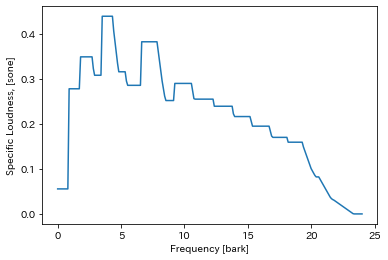

In [30]:
signal, fs = load( True, wav_path)
loudness = comp_loudness(True, signal, fs, field_type = 'free')

N = loudness['specific values']
bark_scale = np.linspace(0, 24, num=len(N))
plt.plot(bark_scale, N)
plt.xlabel("Frequency [bark]")
plt.ylabel("Specific Loudness, [sone]")
plt.show()

In [24]:
spec = loudness['specific values']
f = np.linspace(0, 24, num=len(N))

loudness_spec_center_log = np.sum( np.log2( f+0.1) * spec) / np.sum(spec)
loudness_spec_center = np.sum( f * spec) / np.sum(spec)

np.sum( f * spec**2) / np.sum(spec**2)
np.sum( np.log2( f+0.1) * spec**2) / np.sum(spec**2)

2.675907401163989

 - 適当に重心出すかな。

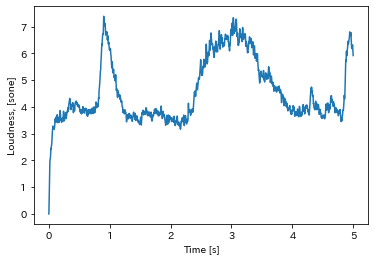

In [31]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mosqito.functions.shared.load import load
# from mosqito.functions.loudness_zwicker.comp_loudness import comp_loudness

# signal, fs = load(False, wav_path, calib = 2 * 2**0.5 )
loudness = comp_loudness(False, signal, fs, field_type = 'free')

N = loudness['values']
time = np.linspace(0,0.002*(N.size - 1),N.size)
plt.plot(time, N)
plt.xlabel("Time [s]")
plt.ylabel("Loudness, [sone]")
plt.show()

- 適当に平均だすかな

In [30]:
import scipy


In [31]:
from mosqito.functions.shared.load import load
from mosqito.functions.loudness_zwicker.comp_loudness import comp_loudness

signal, fs = load( None, wav_path)

# Steady
loudness_steady = comp_loudness(True, signal, fs, field_type = 'free')

spec = loudness_steady['specific values']
bank = np.linspace(0, 24, num=len(spec)) + 1

loudness_spec_center_log           = np.sum( np.log2( bank) * spec) / np.sum(spec)
loudness_spec_center                   = np.sum( bank * spec) / np.sum(spec)
loudness_spec_center_log_pow = np.sum( np.log2( bank) * spec**2) / np.sum(spec**2)
loudness_spec_center_pow         = np.sum( bank * spec**2) / np.sum(spec**2)

# UnSteady
loudness_unsteady = comp_loudness(False, signal, fs, field_type = 'free')
sone = loudness_unsteady['values']
time = np.linspace(0,0.002*(sone.size - 1), sone.size)

loudness_unsteady_mean = np.mean(sone)
loudness_unsteady_std = np.std(sone)
loudness_unsteady_skew = scipy.stats.skew(sone)
loudness_unsteady_kurtosis = scipy.stats.kurtosis(sone)

Signal resampled to 48 kHz to allow calculation.


# Sharpness を追加する

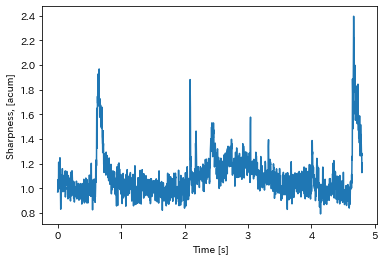

In [32]:
from mosqito.functions.sharpness.comp_sharpness import comp_sharpness

sharpness = comp_sharpness(False, signal, fs, method="din", skip=0.2)

# Plot
S = sharpness['values']
time = np.linspace(0,0.002*(S.size - 1),S.size)
plt.plot(time, S)
plt.xlabel("Time [s]")
plt.ylabel("Sharpness, [acum]")
plt.show()

In [34]:
from mosqito.functions.sharpness.comp_sharpness import comp_sharpness

# Sharpness calculation
sharpness = comp_sharpness(True, signal, fs, method="din")

DIN sharpness: 1.16 acum


In [35]:
sharpness

{'name': 'sharpness', 'method': 'din', 'values': 1.1647410551134927, 'skip': 0}

# roughness

Roughness is being calculated


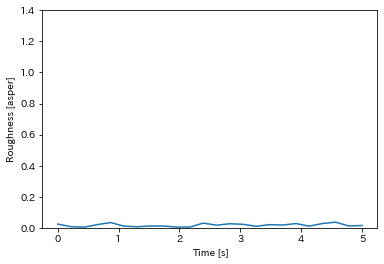

In [36]:
from mosqito.functions.roughness_danielweber.comp_roughness import comp_roughness
roughness = comp_roughness(signal, fs, overlap=0)


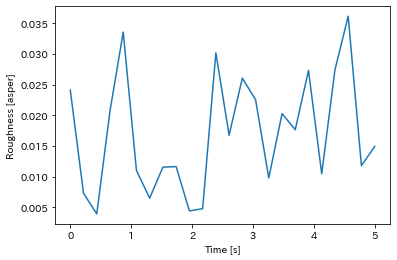

In [37]:

plt.plot(roughness['time'], roughness['values'])
plt.xlabel("Time [s]")
plt.ylabel("Roughness [asper]")
plt.show()


In [38]:
np.mean( roughness['values'])

0.017140287110175716

# 出力形式

 - 色々考えて
 - 時系列変動のグラフ出力
 - 平均値出力にする